In [1]:
import sklearn
import numpy as np

assert sklearn.__version__ >= "1.0.1"

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## 로지스틱 회귀

### 확률 추정

```python
# extra code – generates and saves Figure 4–21

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()
```

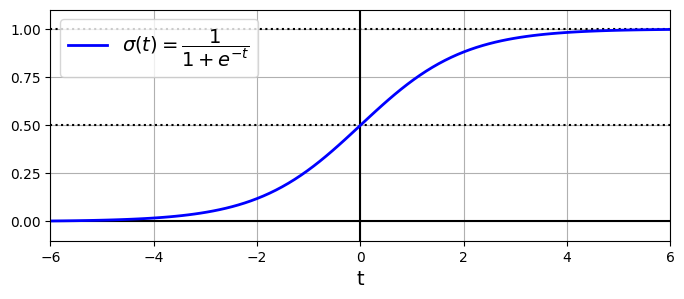

### 결정 경계

```python
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
```

In [3]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True) # as_frame=True는 데이터 프레임으로 만들어주는것

```python
iris.data.head(3)
```

In [4]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


```python
iris.target.head(3)  # note that the instances are not shuffled
```

In [5]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

```python
iris.target_names
```

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
```

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

```python
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]
decision_boundary
```

In [68]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector, 새로운 x 정의 0~3사이의 값 1000개
y_proba = log_reg.predict_proba(X_new) # 확률 예측 함수
y_proba # 버지니카 클래스일 확률 / 버지니카 클래스가 아닐 확률

array([[0.99822633, 0.00177367],
       [0.99820582, 0.00179418],
       [0.99818506, 0.00181494],
       ...,
       [0.00574788, 0.99425212],
       [0.00568241, 0.99431759],
       [0.00561769, 0.99438231]])

In [69]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]
decision_boundary # 결정경계에 있는 petal width (cm) 값

1.6516516516516517

시각화

```python
plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba") ## 파란 점선 (시그모이드 곡선)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba") ## 초록 선 (시그모이드 곡선)
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–21
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()
```

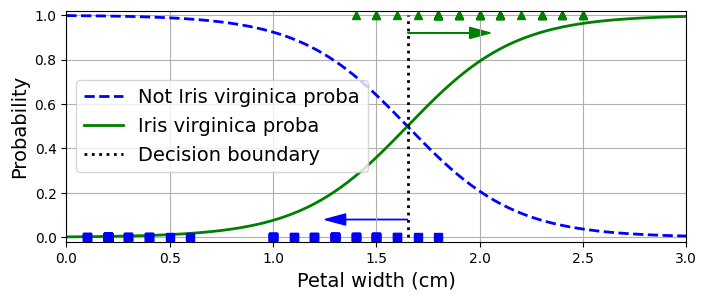

```python
decision_boundary
```

```python
log_reg.predict([[1.7], [1.5]])
```

In [14]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

컬럼 추가 (petal length (cm))

```python
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)
```

In [15]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=42)

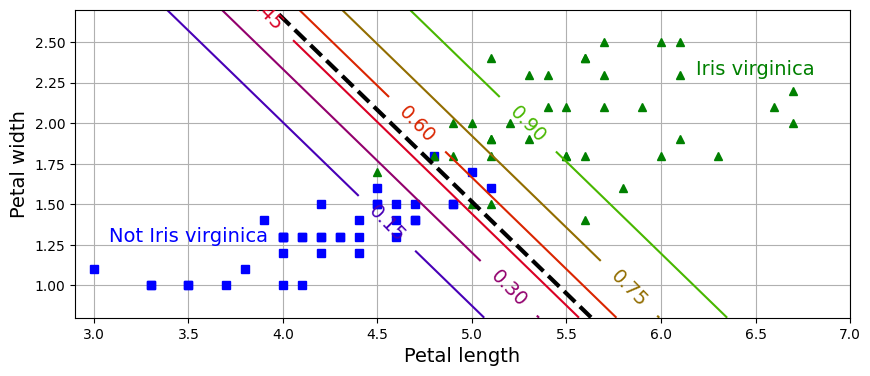

In [ ]:
# 직선을 그리기 위한 데이터셋
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # x-좌표와 y-좌표를 묶어 2개의 특성으로 지정.
y_proba = log_reg.predict_proba(X_new) # 예측 확률: 음성 확률과 양성 확률의 튜플

# 버지니카로 판정될 양성 확률을 등고선 그릴 때 사용
zz = y_proba[:, 1].reshape(x0.shape)   # 양성 예측 확률만 사용

# 결정 경계: theta0 + x1 * theta1 + x2 * theta2 = 0 을 만족시키는 직선
left_right = np.array([2.9, 7]) # 직선상에 위치한 두 점의 x-좌표
# 두 점의 y-좌표 계산
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

# 그래프 그리기
plt.figure(figsize=(10, 4))

# 산점도: 파랑 네모. 버지니카가 아닌 샘플
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
# 산점도: 초록 세모. 버지니카인 샘플
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")

# 등고선: 버지니카일 확률 기준
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1) # 양성 확률 함께 표시

# 결정 경계 그리기
plt.plot(left_right, boundary, "k--", linewidth=3)

# 기타 문장 표시
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")

# 축 레이블 표시
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

### 소프트맥스 회귀

- 소프트맥스 모델 훈련
    - `LogisticRegression` 모델을 다중 클래스 분류 모델로 훈련시키면 `multi_class='multinomial'` 옵션이
        자동 지정되어 소프트맥스 회귀를 적용함
    - `C=30`: 약한 규제

```python
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)
```

In [16]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

```python
softmax_reg.predict([[5, 2]])
```

In [17]:
softmax_reg.predict([[5, 2]])

array([2])

```python
softmax_reg.predict_proba([[5, 2]]).round(2)
```

In [18]:
softmax_reg.predict_proba([[5, 2]]).round(2) # 각 클래스에 대해 확률값으로 내는 것

array([[0.  , 0.04, 0.96]])

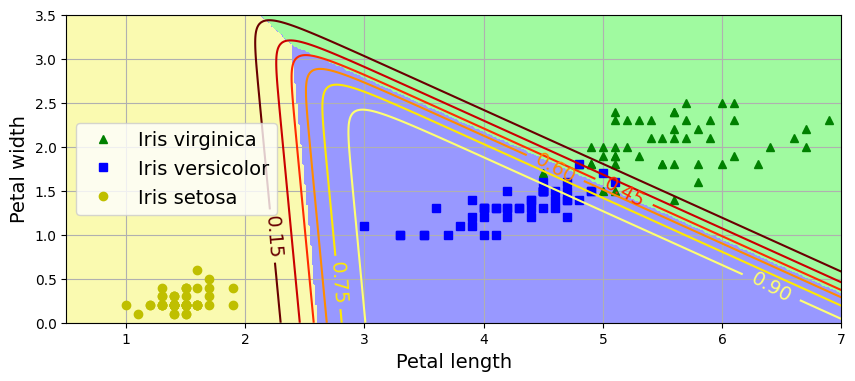

In [ ]:
# 레이블 별 바탕화면 색 지정
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"]) # 노랑, 파랑, 초록

# 바탕화면을 그리기위한 좌표
# x-좌표
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

# y-좌표
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

# `contour` 용 y-좌표: 버시컬러 확률 기준
zz1 = y_proba[:, 1].reshape(x0.shape)
# `contourf` 용 y-좌표: 예측값 기준
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

# 등고선 그리기: 색으로 구분. 예측 확률 기준
plt.contourf(x0, x1, zz, cmap=custom_cmap)
# 등고선 그리기: 버시컬러 품종일 가능성 확률 기준
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

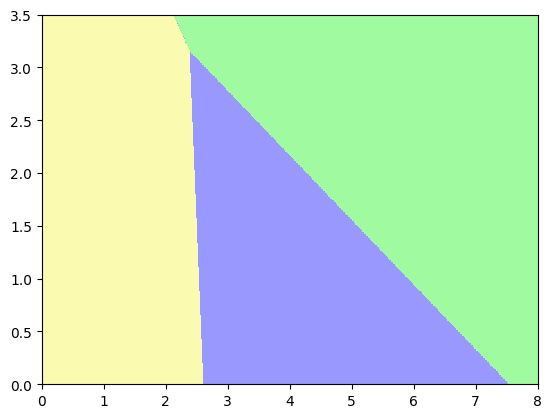

In [ ]:
plt.contourf(x0, x1, zz, cmap=custom_cmap)

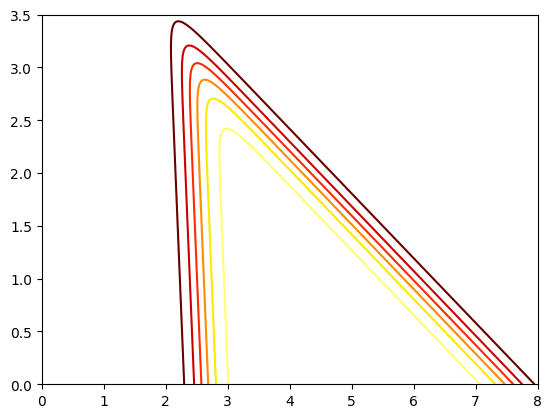

In [ ]:
contour = plt.contour(x0, x1, zz1, cmap="hot")
contour